# Bamboo Weekly 6 |  End of the humanities?

This week, we look into the subjects that US college students are studying — and how that compares with data from the last 50 years. What are they studying more, and what are they studying less?

> Source: https://www.bambooweekly.com/p/bw-6-end-of-the-humanities

In [37]:
# import
import re
import pandas as pd
from urllib.request import urlretrieve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('max_colwidth', None)
# pd.set_option('display.float_format',  '{:,.3f}'.format)
print("Setup Complete")

Setup Complete


In [2]:
# Source
dataset_url = "https://nces.ed.gov/programs/digest/d21/tables/xls/tabn322.10.xls"


In [ ]:
#  will just put it here
dtype_dict = {
    "1970-71": float,
    "1975-76": float,
    "1980-81": float,
    "1985-86": float,
    "1990-91": float,
    "1995-96": float,
    "2000-01": float,
    "2005-06": float,
    "2010-11": float,
    "2011-12": float,
    "2012-13": float,
    "2013-14": float,
    "2014-15": float,
    "2015-16": float,
    "2016-17": float,
    "2017-18": float,
    "2018-19": float,
    "2019-20": float,
}

In [23]:
# Q1 Retrieve the Excel file with selected years, and turn it into a data frame.
# Q2 Remove the line numbering the surveys. Remove the total. And remove the lines at the bottom, after "Other and not classified".


# Extract data from https://nces.ed.gov/programs/digest/d21/tables/dt21_322.10.asp

def get_and_read(url: str) -> pd.DataFrame:
    filename, _ = urlretrieve(url)
    df = pd.read_excel(
        filename,
        sheet_name="Digest 2021 Table 322.10",
        skipfooter=5,
        skiprows=lambda x: x in [0, 2, 3],        
    )
    return df


df = get_and_read(dataset_url)
df.head(n=3)


,Field of study,1970-71,1975-76,1980-81,1985-86,1990-91,1995-96,2000-01,2005-06,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20
0,Agriculture and natural resources\1\,12674,19402,21886,17191,13363,21757,23766,23497,29203,31629,34304,35953,37028,37827,38782,40334,41373,41848
1,Architecture and related services,5570,9146,9455,9119,9781,8352,8480,9515,9831,9727,9757,9149,9090,8825,8579,8464,8806,9045
2,"Area, ethnic, cultural, gender, and group studies",2579,3577,2887,3021,4776,5633,6160,7878,8955,9228,8850,8275,7783,7840,7720,7717,7733,7767


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Field of study  33 non-null     object 
 1   1970-71         33 non-null     float64
 2   1975-76         33 non-null     float64
 3   1980-81         33 non-null     float64
 4   1985-86         33 non-null     float64
 5   1990-91         33 non-null     float64
 6   1995-96         33 non-null     float64
 7   2000-01         33 non-null     float64
 8   2005-06         33 non-null     float64
 9   2010-11         33 non-null     float64
 10  2011-12         33 non-null     float64
 11  2012-13         33 non-null     float64
 12  2013-14         33 non-null     float64
 13  2014-15         33 non-null     float64
 14  2015-16         33 non-null     float64
 15  2016-17         33 non-null     float64
 16  2017-18         33 non-null     float64
 17  2018-19         33 non-null     float

In [6]:
# format_dict = {col_name: float for col_name in df.select_dtypes(int).columns}
# format_dict

In [25]:
# Q3 Remove the \n\ markings (for footnotes) from the "Field of study" column
# Q4 Remove newlines and other extraneous whitespace from the "Field of study" column
# Q5 Set the "Field of study" column to be the index.

# Tweak DataFrame
def tweak_df(df: pd.DataFrame) -> pd.DataFrame:
   df["Field of study"] = list(map(lambda text: re.sub(r"[^a-zA-Z ]+"," ",text).lower(), df["Field of study"]))
   df["Field of study"] = list(map(lambda x: " ".join(x.split()), df["Field of study"]))
   return df.set_index("Field of study")

df_ = tweak_df(df)
df_.head()

,1970-71,1975-76,1980-81,1985-86,1990-91,1995-96,2000-01,2005-06,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20
Field of study,,,,,,,,,,,,,,,,,,
agriculture and natural resources,12674,19402,21886,17191,13363,21757,23766,23497,29203,31629,34304,35953,37028,37827,38782,40334,41373,41848
architecture and related services,5570,9146,9455,9119,9781,8352,8480,9515,9831,9727,9757,9149,9090,8825,8579,8464,8806,9045
area ethnic cultural gender and group studies,2579,3577,2887,3021,4776,5633,6160,7878,8955,9228,8850,8275,7783,7840,7720,7717,7733,7767
biological and biomedical sciences,35705,54154,43078,38395,39482,61014,60576,70602,89984,95850,100397,104657,109904,113794,116768,118661,121233,126590
business,115396,143171,200521,236700,249165,226623,263515,318043,365133,367235,360887,358132,363741,371690,381109,386240,390490,387851


In [26]:
# Q6 Which majors have had the greatest *increase* since the survey began in 1970-1971?

# My approach is to pivot the table such as the year is the index
def tweak_df_(df: pd.DataFrame) -> pd.DataFrame:
       return (df
              .stack()
              .reset_index()
              .rename(columns={'Field of study':'field_of_study', 'level_1': 'year', 0:'num_enroll'})
              .set_index("year")
              .sort_index(ascending=True))

df_pivot =  tweak_df_(df_)
df_pivot

,field_of_study,num_enroll
year,,
1970-71,agriculture and natural resources,12674
1970-71,transportation and materials moving,0
1970-71,biological and biomedical sciences,35705
1970-71,theology and religious vocations,3720
1970-71,business,115396
...,...,...
2019-20,legal professions and studies,4262
2019-20,english language and literature letters,38036
2019-20,precision production,39


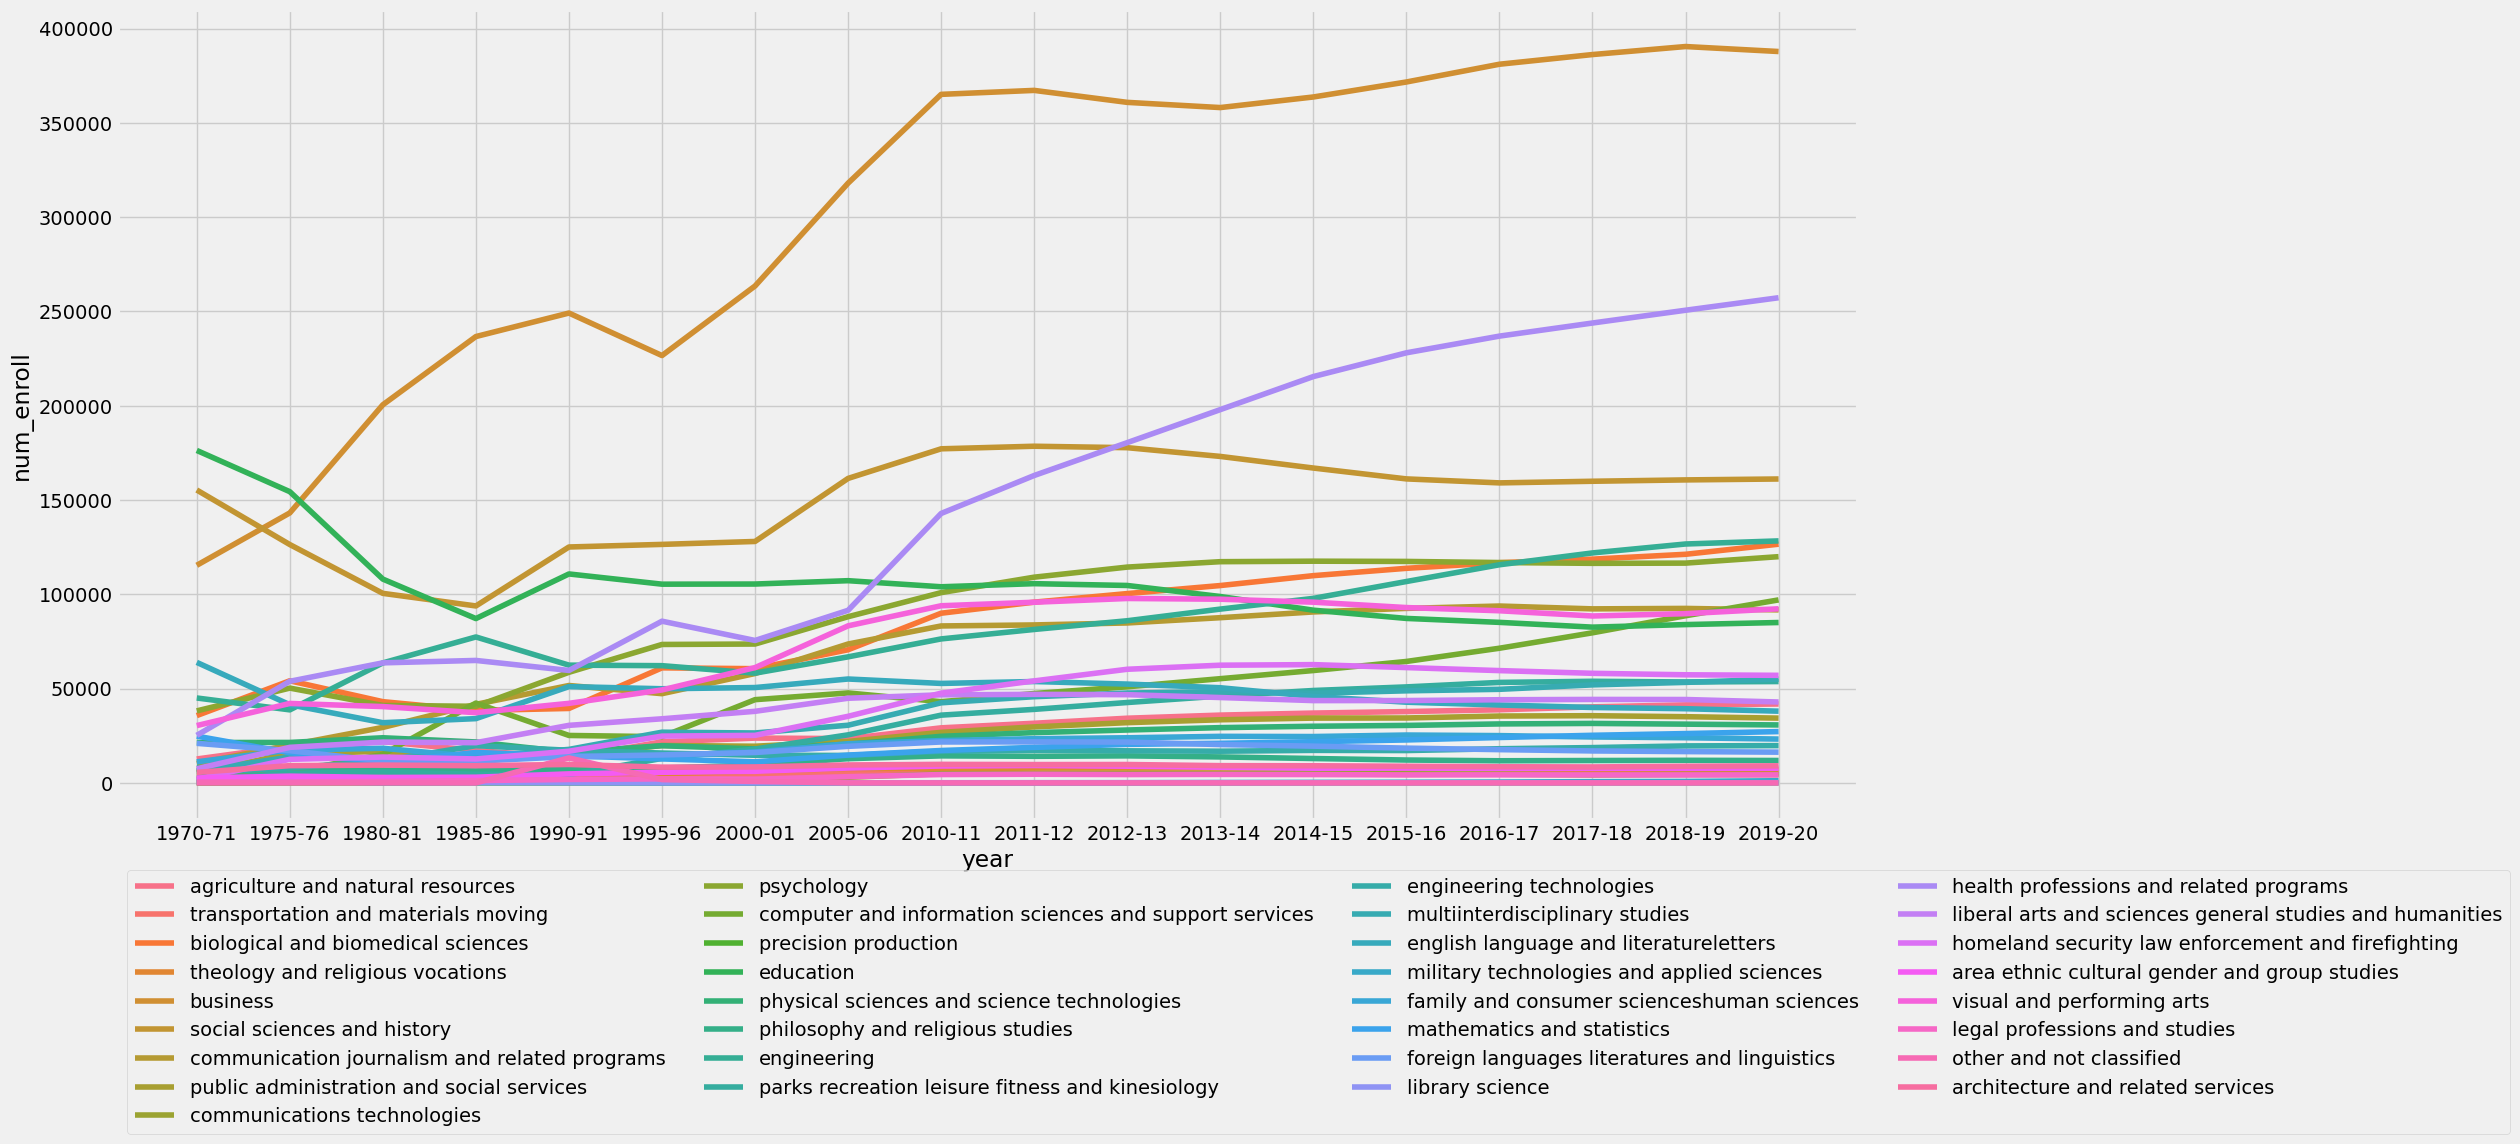

In [11]:
# Q6 Which majors have had the greatest *increase* since the survey began in 1970-1971?

# Plot
plt.style.use("fivethirtyeight")
plt.figure(figsize=(20, 10))
sns.lineplot(data=df_pivot, 
             x="year", 
             y="num_enroll", 
             hue="field_of_study", 
             legend="auto",
        )
plt.legend(loc='lower left', bbox_to_anchor=(0, -0.4), ncol=4)
plt.ion()
plt.show()

#  Social sciences and history  have the greatest increase starting from 1970 to 1990-91 then 1995-96 up to 2010-2011

In [33]:
# Checking the num of enrollees below 3000
df_3000 = df_pivot.loc[df_pivot["num_enroll"]<=3_000]
df_3000

,field_of_study,num_enroll
year,,
1970-71,transportation and materials moving,0
1970-71,communications technologies,478
1970-71,computer and information sciences and support services,2388
1970-71,precision production,0
1970-71,parks recreation leisure fitness and kinesiology,1621
...,...,...
2018-19,military technologies and applied sciences,767
2019-20,military technologies and applied sciences,1156
2019-20,library science,118


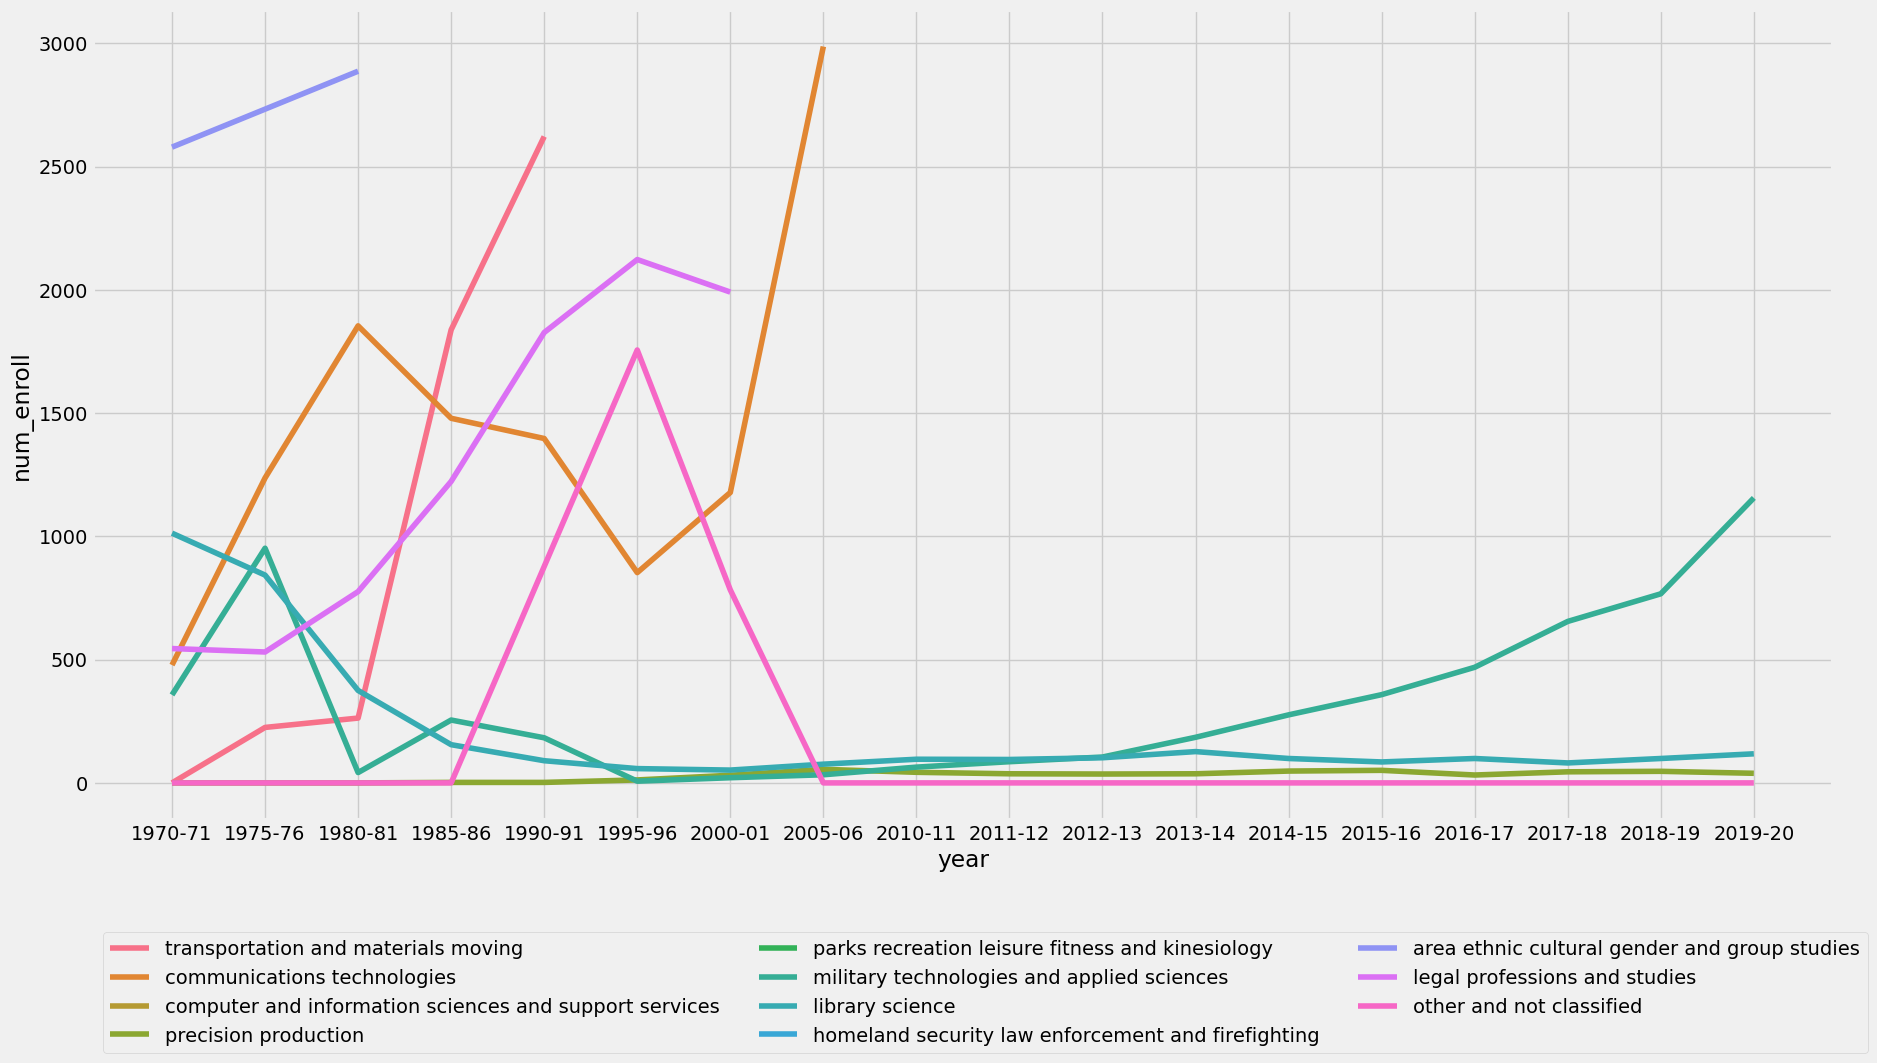

In [35]:
# Q8 Which majors have had the greatest *decrease* since the survey began in 1970-1971?
# Plot
plt.style.use("fivethirtyeight")
plt.figure(figsize=(20, 10))
sns.lineplot(data=df_3000, 
             x="year", 
             y="num_enroll", 
             hue="field_of_study", 
             legend="auto",
             style="field_of_study",
             dashes=False)
plt.legend(loc='lower left', bbox_to_anchor=(0, -0.3), ncol=3)
plt.ion()
plt.show()

#  Library science have the greatest decrease from 1000 in 1970-71 to less than 200 in 2019-20. I think we should re-define the role of library
# in the age of ai

In [34]:
# Q9 If we only look at the last 10 years of the study (i.e., starting in 2010-11), do we see similar changes in majors?
df_2010_onwards = df_pivot.loc['2010-11':]
df_2010_onwards

,field_of_study,num_enroll
year,,
2010-11,visual and performing arts,93939
2010-11,precision production,43
2010-11,military technologies and applied sciences,64
2010-11,transportation and materials moving,4941
2010-11,social sciences and history,177169
...,...,...
2019-20,legal professions and studies,4262
2019-20,english language and literature letters,38036
2019-20,precision production,39


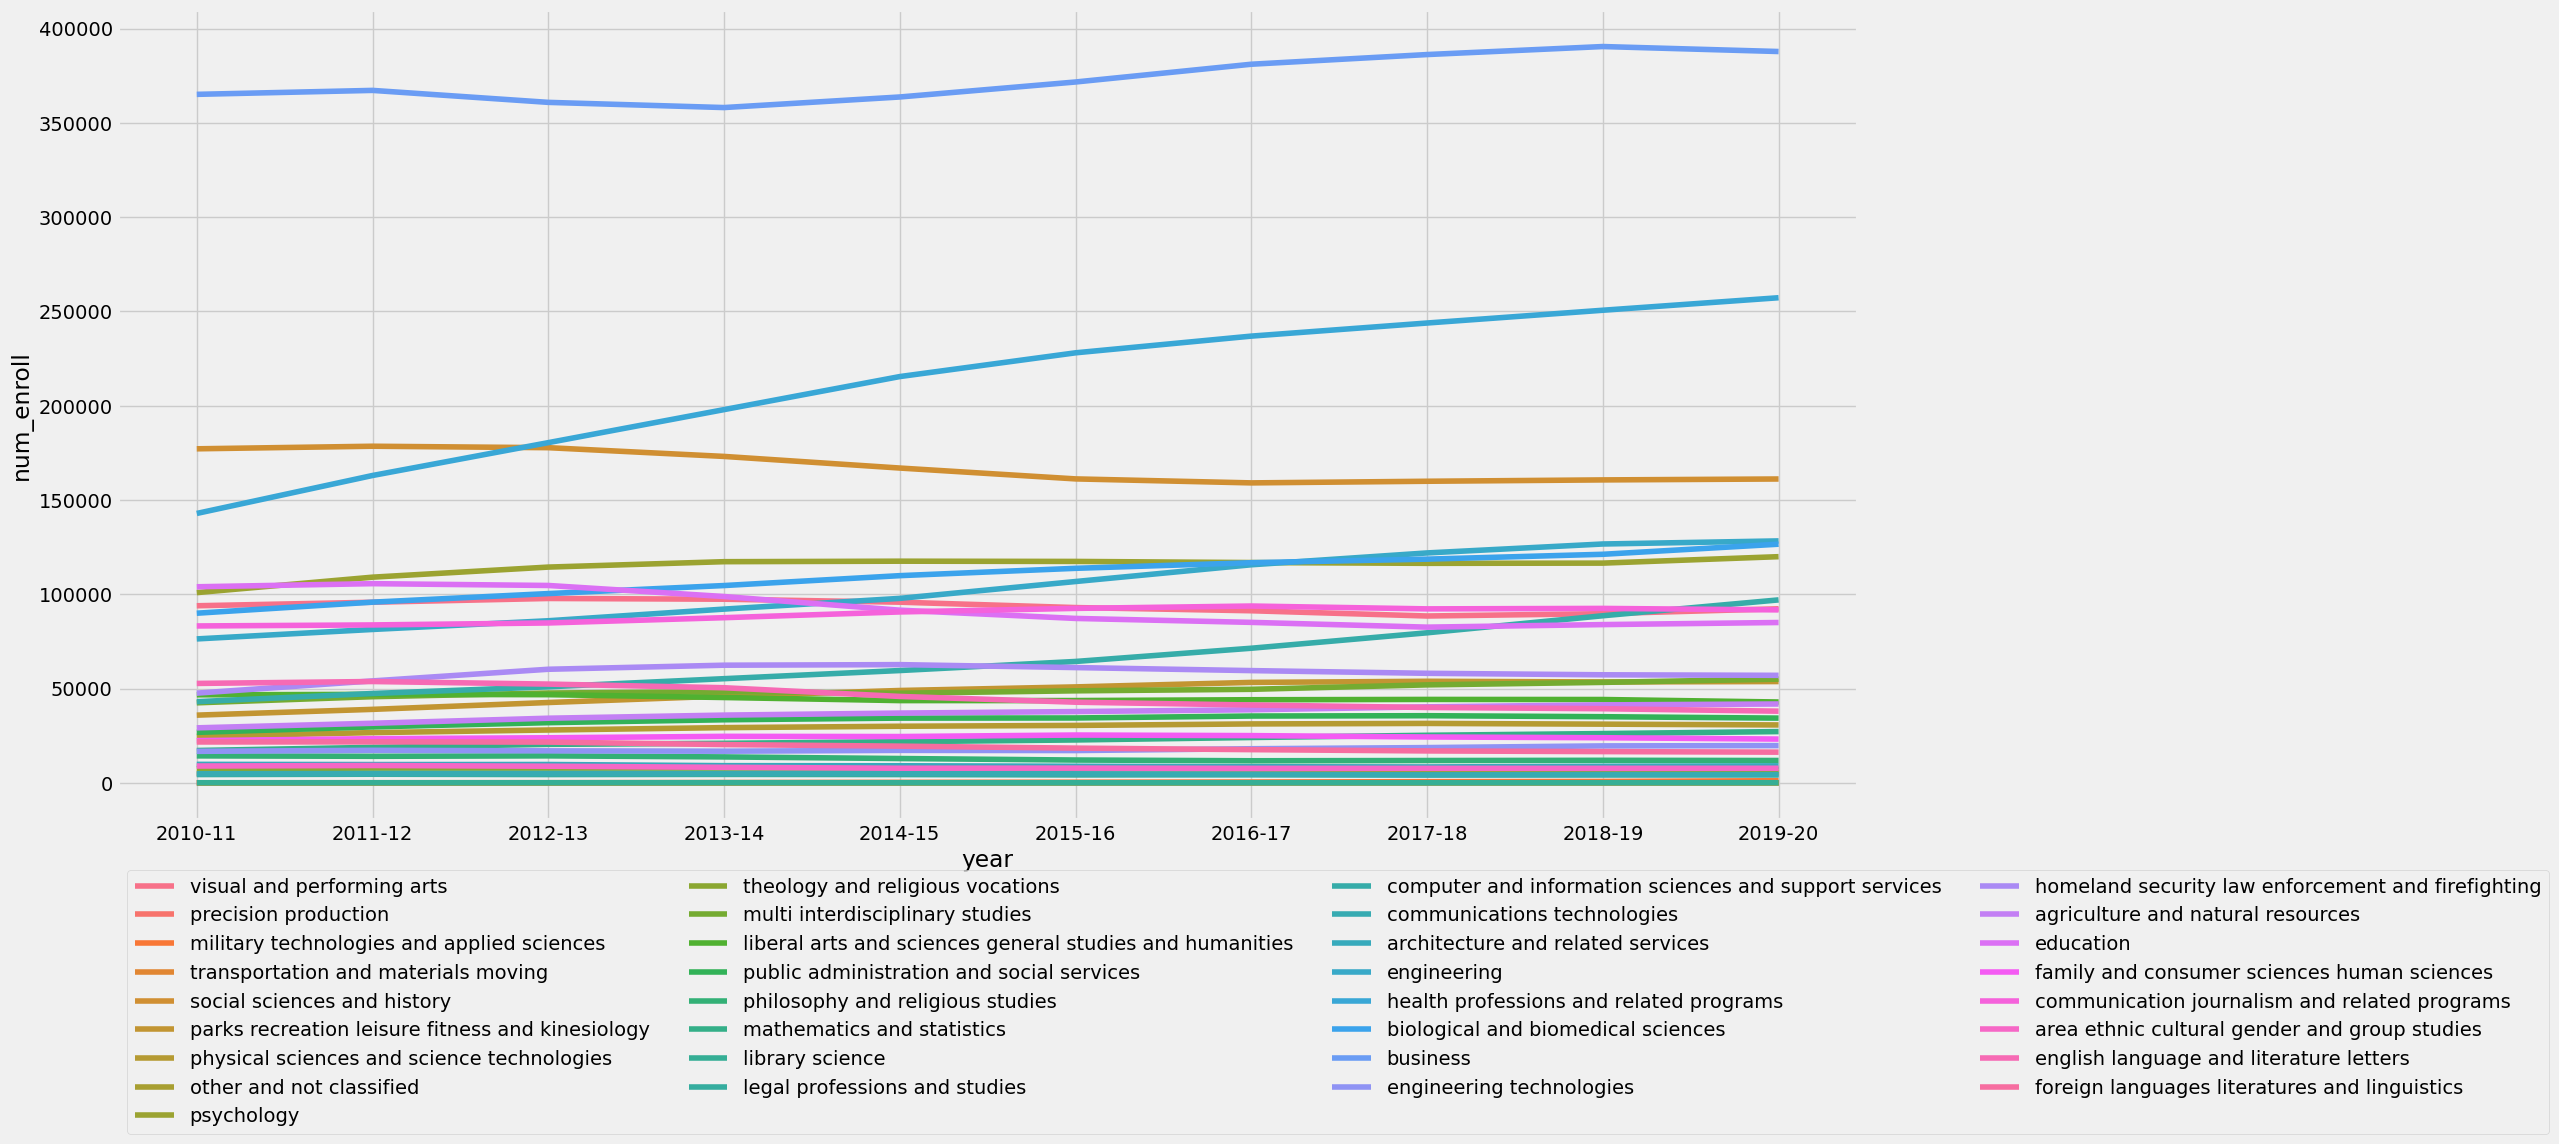

In [36]:
# Q9 If we only look at the last 10 years of the study (i.e., starting in 2010-11), do we see similar changes in majors?
# Plot
plt.style.use("fivethirtyeight")
plt.figure(figsize=(20, 10))
sns.lineplot(data=df_2010_onwards, 
             x="year", 
             y="num_enroll", 
             hue="field_of_study", 
             legend="auto",
        )
plt.legend(loc='lower left', bbox_to_anchor=(0, -0.4), ncol=4)
plt.ion()
plt.show()

#  biological and biomedical sciences increased to 25_000 enrollees in 2019-20 from ~15_000 in 2010-11 

In [16]:
# Q10 What percentage decline do we see in all fields containing
# the word "art," "language," "history," or "culture" in their names in the last 10 years?
search_string_list = ["arts", "language", "history", "culture"]

df_q10 = df_pivot.loc[
    df_pivot["field_of_study"].apply(
        lambda x: any(
            re.search(r"\b" + re.escape(word) + r"\b", x) for word in search_string_list
        )
    )
]

df_q10.head()


,field_of_study,num_enroll
year,,
1970-71,social sciences and history,155324.0
1970-71,english language and literatureletters,63914.0
1970-71,liberal arts and sciences general studies and humanities,7481.0
1970-71,visual and performing arts,30394.0
1975-76,liberal arts and sciences general studies and humanities,18855.0


In [40]:
# Q10 What percentage decline do we see in all fields containing
# the word "art," "language," "history," or "culture" in their names in the last 10 years?

df_q10_ = pd.DataFrame(df_q10.groupby(["year"])["num_enroll"].sum())
df_q10_.assign(perc_diff = df_q10_["num_enroll"].rolling(window=2).apply(np.diff) / df_q10_["num_enroll"].sum())

# My approach is after I filtered the target words, I group the table by year then aggregate all the enrollees. 
# I approach the percentage based on the total enrollees from 1970 to 2020 instead of percentage of the target field of study per year
# The percentage decline of around 0.05% started in 1975 to 1986 then we can see small decrease in 2012 to 2018

,num_enroll,perc_diff
year,,
1970-71,257113.0,NaN
1975-76,228841.0,-0.005127
1980-81,194557.0,-0.006217
1985-86,186500.0,-0.001461
1990-91,248883.0,0.011312
1995-96,259700.0,0.001961
2000-01,277715.0,0.003267
2005-06,344752.0,0.012156
2010-11,370579.0,0.004683


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


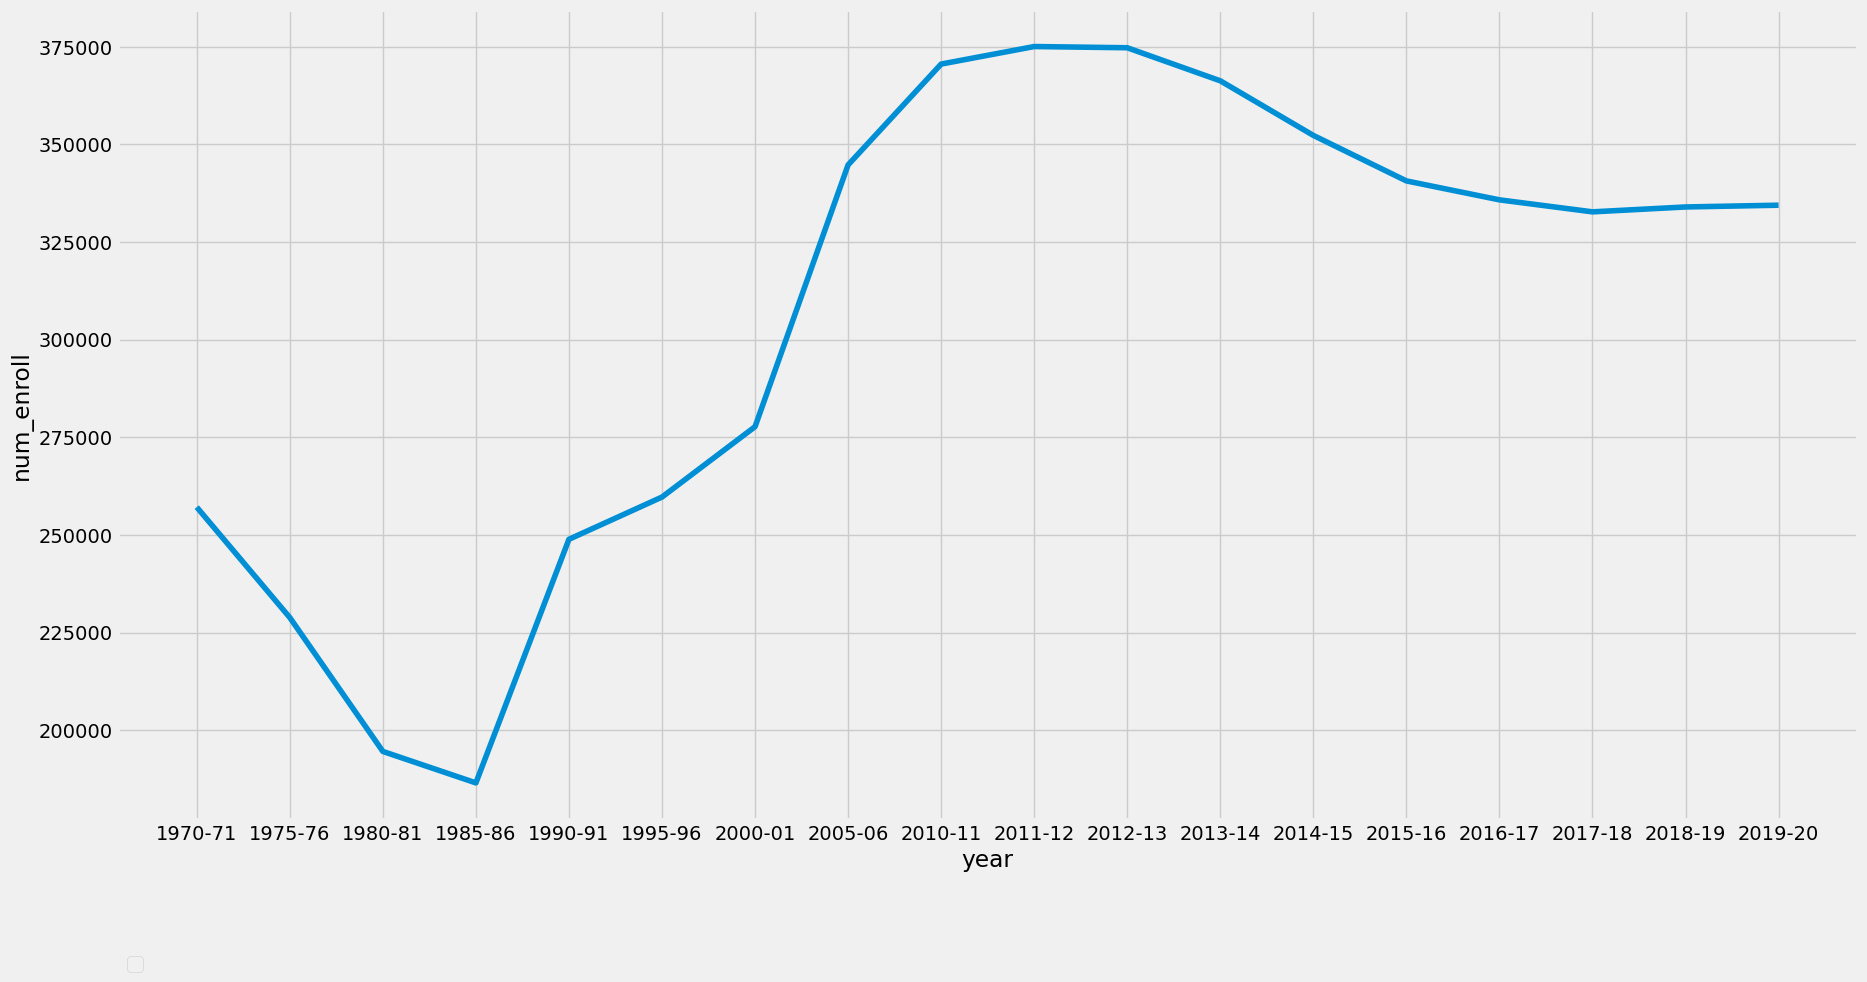

In [42]:
# Q10 What percentage decline do we see in all fields containing
# the word "art," "language," "history," or "culture" in their names in the last 10 years?
# Plot
plt.style.use("fivethirtyeight")
plt.figure(figsize=(20, 10))
sns.lineplot(data=df_q10_, 
             x="year", 
             y="num_enroll",  
             legend="auto",
        )
plt.legend(loc='lower left', bbox_to_anchor=(0, -0.2), ncol=2)
plt.show()

# My approach is after I filtered the target words, I group the table by year then aggregate all the enrollees. 
# I approach the percentage based on the total enrollees from 1970 to 2020 instead of percentage of the target field of study per year
# The percentage decline of around 0.05% started in 1975 to 1986 then we can see small decrease in 2012 to 2018